In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import utils
utils.set_pretty_prints()

In [2]:
import tensorflow as tf
print("We have tensorflow version", tf.__version__)

We have tensorflow version 2.1.0


In [3]:
from sklearn import datasets

In [4]:
boston_data = datasets.load_boston()

In [5]:
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
boston_data.data[:2]

array([[  0.01,  18.  ,   2.31,   0.  ,   0.54,   6.58,  65.2 ,   4.09,
          1.  , 296.  ,  15.3 , 396.9 ,   4.98],
       [  0.03,   0.  ,   7.07,   0.  ,   0.47,   6.42,  78.9 ,   4.97,
          2.  , 242.  ,  17.8 , 396.9 ,   9.14]])

In [7]:
boston_data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
df_boston = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)

In [9]:
df_boston.iloc[:30]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.0063,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.0273,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.0273,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.0324,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.0691,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.0299,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.0883,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.1446,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.2112,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.1700,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [10]:
boston_data.target[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [11]:
df_boston['PRICE'] = boston_data.target

In [12]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.0063,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.0273,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.0273,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.0324,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.0691,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
df_boston.shape

(506, 14)

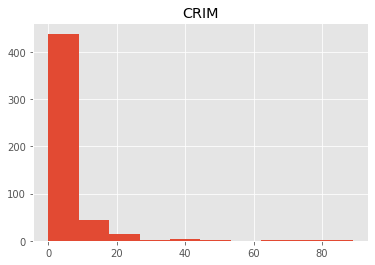

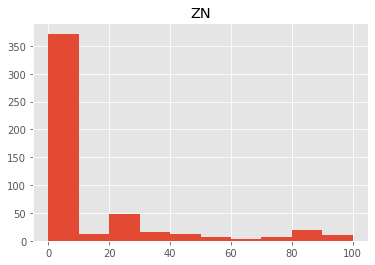

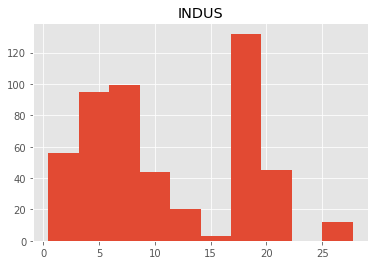

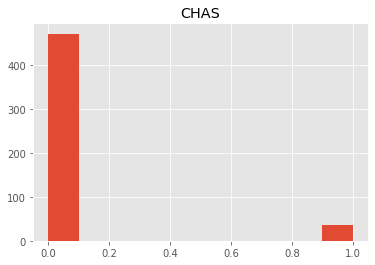

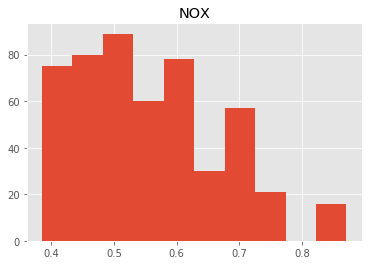

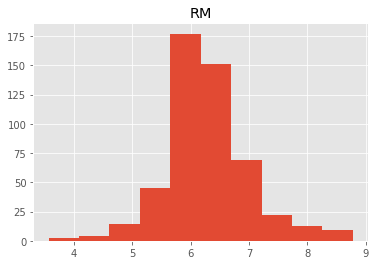

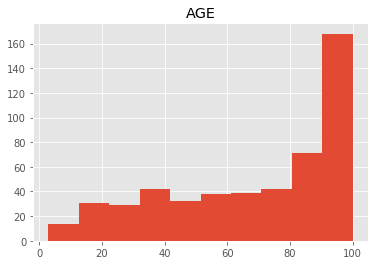

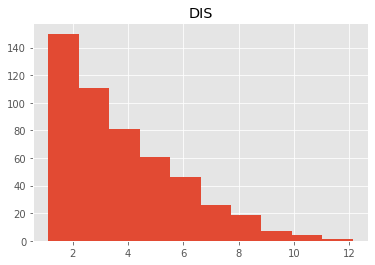

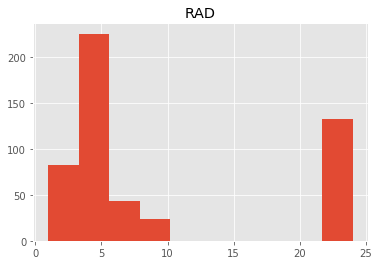

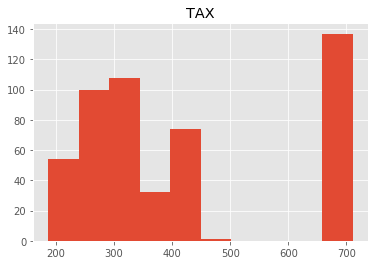

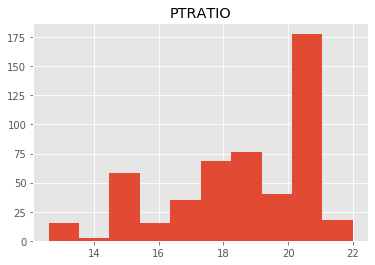

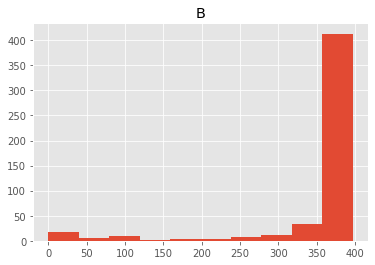

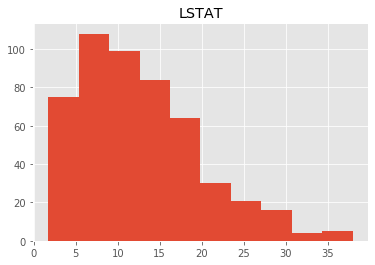

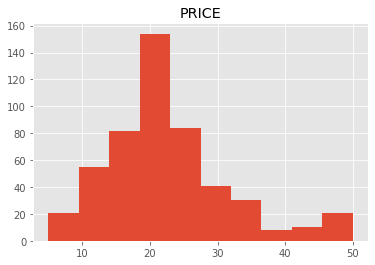

In [14]:
for col in df_boston.columns:
    plt.figure()
    ser = df_boston[col]
    ser.hist()
    plt.title(col)

F(x1,x2,x3...) = a\*x1 + b\*x2 + c\*x3 + .... + constant

In [15]:
tf_input = tf.keras.layers.Input((13,))
lin_func = tf.keras.layers.Dense(1)
tf_out = lin_func(tf_input)
model = tf.keras.models.Model(tf_input, tf_out)

In [16]:
lin_func.get_weights()

[array([[ 0.5 ],
        [-0.18],
        [ 0.39],
        [-0.64],
        [ 0.17],
        [-0.13],
        [ 0.32],
        [ 0.19],
        [ 0.27],
        [ 0.23],
        [-0.42],
        [ 0.57],
        [ 0.05]], dtype=float32),
 array([0.], dtype=float32)]

In [17]:
_X = boston_data.data.astype(np.float32)
_y = boston_data.target.astype(np.float32).reshape((-1,1))

mean_X = _X.mean(axis=0)
std_X = _X.std(axis=0)
print(mean_X)
print(std_X)

_X = (_X - mean_X) / std_X


test_size = 10
test_idxs = np.random.choice(_X.shape[0], size=10, replace=False)
train_idxs = list(set(np.arange(_X.shape[0])) - set(test_idxs))

X_train = _X[train_idxs]
X_test = _X[test_idxs]

y_train = _y[train_idxs]
y_test = _y[test_idxs]
print(X_train.shape)
print(X_test.shape)

[  3.61  11.36  11.14   0.07   0.55   6.28  68.57   3.8    9.55 408.24
  18.46 356.67  12.65]
[  8.59  23.3    6.85   0.25   0.12   0.7   28.12   2.1    8.7  168.37
   2.16  91.2    7.13]
(496, 13)
(10, 13)


In [18]:
y_hat = model.predict(X_train)
y_hat.shape

(496, 1)

In [19]:
y_hat[:10]

array([[-0.31],
       [-0.23],
       [-0.64],
       [-1.14],
       [-1.04],
       [-0.87],
       [ 0.5 ],
       [ 0.91],
       [ 1.08],
       [ 0.8 ]], dtype=float32)

In [20]:
def show_results(pred, gold, label=''):
    pred = pred.ravel()
    gold = gold.ravel()
    df_snapshot = pd.DataFrame({'PRED' : pred, 'TRUTH' : gold, 'AERR' : np.abs(gold-pred)})
    print("Results so far {}:\n{}".format(label, df_snapshot.iloc[:20]))
    print("Overall abs average error: {:.2f}".format(df_snapshot['AERR'].mean()))
    return df_snapshot

res = show_results(y_hat, y_train)

Results so far :
      PRED  TRUTH     AERR
0  -0.3096   24.0  24.3096
1  -0.2255   21.6  21.8255
2  -0.6353   34.7  35.3353
3  -1.1394   33.4  34.5394
4  -1.0378   36.2  37.2378
5  -0.8717   28.7  29.5717
6   0.5026   22.9  22.3974
7   0.9052   27.1  26.1948
8   1.0818   16.5  15.4182
9   0.8014   18.9  18.0986
10  0.8686   15.0  14.1314
11  0.7656   18.9  18.1344
12  0.1925   21.7  21.5075
13 -0.6253   20.4  21.0253
14 -0.5053   18.2  18.7053
15 -0.6897   19.9  20.5897
16 -1.0631   23.1  24.1631
17 -0.4535   17.5  17.9535
18 -1.5378   20.2  21.7378
19 -0.5870   18.2  18.7870
Overall abs average error: 22.59


In [21]:
batch_size = 10
ds = tf.data.Dataset.from_tensor_slices((X_train,y_train))

In [22]:
ds = ds.batch(batch_size)

In [23]:
for i, batch_data in enumerate(ds):
    print(batch_data)
    if i>=1:

        break

(<tf.Tensor: shape=(10, 13), dtype=float32, numpy=
array([[-0.42,  0.28, -1.29, -0.27, -0.14,  0.41, -0.12,  0.14, -0.98,
        -0.67, -1.46,  0.44, -1.08],
       [-0.42, -0.49, -0.59, -0.27, -0.74,  0.19,  0.37,  0.56, -0.87,
        -0.99, -0.3 ,  0.44, -0.49],
       [-0.42, -0.49, -0.59, -0.27, -0.74,  1.28, -0.27,  0.56, -0.87,
        -0.99, -0.3 ,  0.4 , -1.21],
       [-0.42, -0.49, -1.31, -0.27, -0.84,  1.02, -0.81,  1.08, -0.75,
        -1.11,  0.11,  0.42, -1.36],
       [-0.41, -0.49, -1.31, -0.27, -0.84,  1.23, -0.51,  1.08, -0.75,
        -1.11,  0.11,  0.44, -1.03],
       [-0.42, -0.49, -1.31, -0.27, -0.84,  0.21, -0.35,  1.08, -0.75,
        -1.11,  0.11,  0.41, -1.04],
       [-0.41,  0.05, -0.48, -0.27, -0.27, -0.39, -0.07,  0.84, -0.52,
        -0.58, -1.51,  0.43, -0.03],
       [-0.4 ,  0.05, -0.48, -0.27, -0.27, -0.16,  0.98,  1.02, -0.52,
        -0.58, -1.51,  0.44,  0.91],
       [-0.4 ,  0.05, -0.48, -0.27, -0.27, -0.93,  1.12,  1.09, -0.52,
        -0.58,

In [24]:
tf_input = tf.keras.layers.Input((13,))
lin_func = tf.keras.layers.Dense(1)
tf_out = lin_func(tf_input)
model = tf.keras.models.Model(tf_input, tf_out)


grad_prc = 0.01
nr_epochs = 100
y_train_hat = model.predict(X_train)
res = show_results(y_train_hat, y_train, label='RANDOM MODEL ON TRAIN')    

y_test_hat = model.predict(X_test)
res = show_results(y_test_hat, y_test, label='RANDOM MODEL ON TEST')    

optimizer = tf.keras.optimizers.Adam(lr=grad_prc)

epoch_len = _X.shape[0] // batch_size + 1

for epoch in range(1, nr_epochs + 1):
    epoch_losses = []
    for i, batch_data in enumerate(ds):
        with tf.GradientTape() as tape:
            tf_x_batch, tf_y_batch = batch_data
            tf_preds = model(tf_x_batch)
            tf_residual = tf_y_batch - tf_preds
            tf_batch_error = tf.abs(tf_residual)
            tf_error = tf.reduce_mean(tf_batch_error)
        epoch_losses.append(tf_error.numpy())
        print("\rEpoch {} done {:.1f}% - avg loss: {:.3f}".format(epoch, i/epoch_len * 100, np.mean(epoch_losses)),
             end='', flush=True)
        grads = tape.gradient(tf_error, model.trainable_weights) # lin_func.variables)
        #lin_func.variables[0].assign_sub(grad_prc * grads[0]) # a = a - grad_prc * grad_a, b = b - grad_prc * grad_b ...
        #lin_func.variables[1].assign_sub(grad_prc * grads[1]) # bias = bias - grad_prc * grad_bias
        optimizer.apply_gradients(zip(grads, model.trainable_weights))
    print("")
    if (epoch % 20) == 0:      
        pass
        y_train_hat = model.predict(X_train)
        res = show_results(y_train_hat, y_train, label='at epoch {} on TRAIN'.format(epoch))    

        y_test_hat = model.predict(X_test)
        res = show_results(y_test_hat, y_test, label='at epoch {} on TEST'.format(epoch))    

y_train_hat = model.predict(X_train)
res = show_results(y_train_hat, y_train, label='at epoch {} on TRAIN'.format(epoch))    

y_test_hat = model.predict(X_test)
res = show_results(y_test_hat, y_test, label='at epoch {} on TEST'.format(epoch))    

    

Results so far RANDOM MODEL ON TRAIN:
      PRED  TRUTH     AERR
0  -0.4751   24.0  24.4751
1  -0.3199   21.6  21.9199
2  -0.9477   34.7  35.6477
3  -1.0622   33.4  34.4622
4  -0.7817   36.2  36.9817
5  -0.6943   28.7  29.3943
6  -0.4077   22.9  23.3077
7   0.4373   27.1  26.6627
8   1.3870   16.5  15.1130
9   0.1136   18.9  18.7864
10  0.4782   15.0  14.5218
11 -0.2354   18.9  19.1354
12 -0.4728   21.7  22.1728
13 -0.7450   20.4  21.1450
14 -0.1353   18.2  18.3353
15 -0.7558   19.9  20.6558
16 -1.1918   23.1  24.2918
17  0.1643   17.5  17.3357
18  0.0683   20.2  20.1317
19 -0.2129   18.2  18.4129
Overall abs average error: 22.61
Results so far RANDOM MODEL ON TEST:
     PRED  TRUTH     AERR
0 -1.0681   46.7  47.7681
1  4.0074   10.4   6.3926
2  2.0116   15.6  13.5884
3  0.7368   15.2  14.4632
4  3.2936    5.0   1.7064
5  3.5869   11.8   8.2131
6  0.9435   23.1  22.1565
7  0.3974   21.5  21.1026
8  0.2237   24.3  24.0763
9 -0.8830   25.0  25.8830
Overall abs average error: 18.54
Epoch 

coefs = np.linalg.pinv(X.T.dot(X) + 0.1 * np.eye(X.shape[1])).dot(X.T).dot(y)

In [34]:
y_trn = y_train #(y_train -y_train.mean()) / y_train.std()
x_trn = np.hstack((X_train, np.ones((X_train.shape[0],1)))) # add bias term column
regularization = 0.0
coefs = np.linalg.inv(x_trn.T.dot(x_trn) + regularization * np.eye(x_trn.shape[1])).dot(x_trn.T).dot(y_trn.ravel())

In [35]:
preds = x_trn.dot(coefs)

In [36]:
preds[:10]

array([30.  , 25.06, 30.49, 28.5 , 27.86, 25.24, 23.07, 19.71, 11.73,
       19.1 ])

In [37]:
y_trn.ravel()[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9],
      dtype=float32)

In [38]:
coefs[:-1], coefs[-1]

(array([-0.93,  1.12,  0.16,  0.75, -2.02,  2.63,  0.13, -3.02,  2.63,
        -2.07, -2.07,  0.84, -3.76]),
 22.530558984030204)

In [39]:
lin_func.variables[0].numpy().ravel(), lin_func.variables[1].numpy()

(array([-1.16,  0.74, -0.02,  0.46, -0.9 ,  3.83, -0.68, -1.98,  0.88,
        -1.  , -1.65,  1.04, -2.26], dtype=float32),
 array([21.58], dtype=float32))

In [40]:
for i,feat in enumerate(boston_data.feature_names):
    print('  {:<10} {:.2f}'.format(feat, coefs[i]))

  CRIM       -0.93
  ZN         1.12
  INDUS      0.16
  CHAS       0.75
  NOX        -2.02
  RM         2.63
  AGE        0.13
  DIS        -3.02
  RAD        2.63
  TAX        -2.07
  PTRATIO    -2.07
  B          0.84
  LSTAT      -3.76


Text(0.5, 1.0, 'Normal equation')

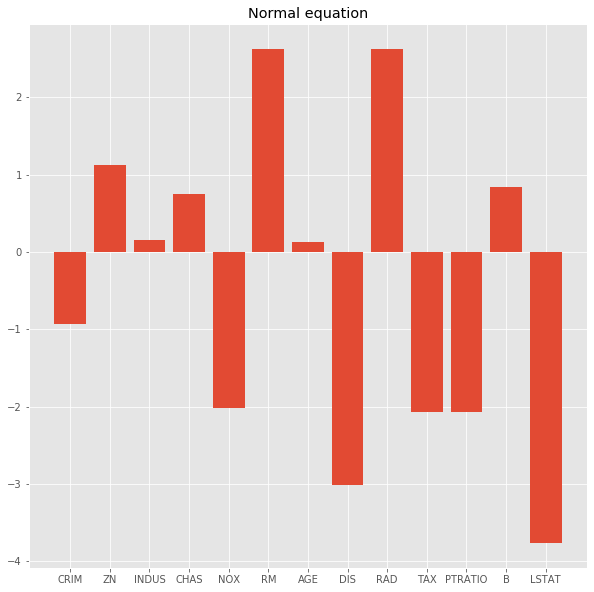

In [41]:
feats = coefs[:-1]
plt.figure(figsize=(10,10))
plt.bar(np.arange(feats.shape[0]), feats, tick_label=boston_data.feature_names)
plt.title("Normal equation")

Text(0.5, 1.0, 'Linear model')

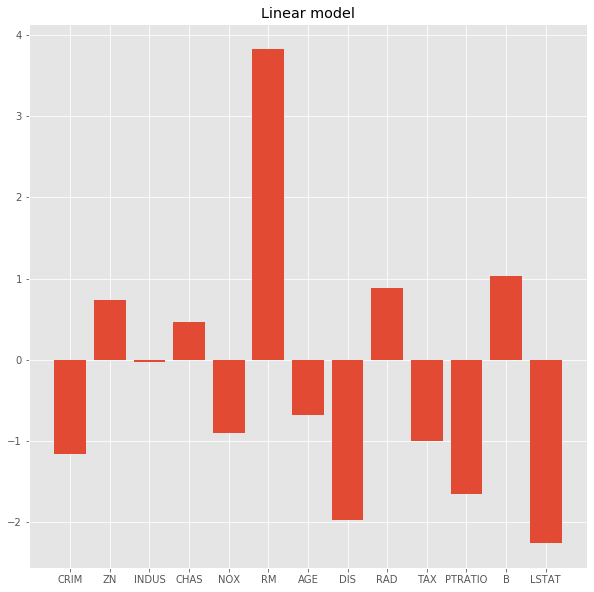

In [42]:
feats = lin_func.variables[0].numpy().ravel()
plt.figure(figsize=(10,10))
plt.bar(np.arange(feats.shape[0]), feats, tick_label=boston_data.feature_names)
plt.title("Linear model")